Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create Small Sample Dataset

In [2]:
dates = pd.date_range(start="2025-09-01", periods=10, freq="D")

data = {
    "Date": dates,
    "Visits": [800, 950, 1100, 700, 1200, 1300, np.nan, 1400, 1250, 900],
    "UniqueVisitors": [500, 600, 720, 450, 800, 850, 780, 900, 820, 610],
    "PageViews": [1500, 1800, 2000, 1300, 2200, 2500, 2400, 2600, 2100, 1600],
    "BounceRate": [45, 50, 47, 55, 42, np.nan, 44, 46, 49, 53],
    "AvgSessionDuration": [4.5, 5.2, 6.1, 3.8, 6.5, 7.0, 6.8, 7.5, 6.2, 4.9]
}

df = pd.DataFrame(data)
print(df)

        Date  Visits  UniqueVisitors  PageViews  BounceRate  \
0 2025-09-01   800.0             500       1500        45.0   
1 2025-09-02   950.0             600       1800        50.0   
2 2025-09-03  1100.0             720       2000        47.0   
3 2025-09-04   700.0             450       1300        55.0   
4 2025-09-05  1200.0             800       2200        42.0   
5 2025-09-06  1300.0             850       2500         NaN   
6 2025-09-07     NaN             780       2400        44.0   
7 2025-09-08  1400.0             900       2600        46.0   
8 2025-09-09  1250.0             820       2100        49.0   
9 2025-09-10   900.0             610       1600        53.0   

   AvgSessionDuration  
0                 4.5  
1                 5.2  
2                 6.1  
3                 3.8  
4                 6.5  
5                 7.0  
6                 6.8  
7                 7.5  
8                 6.2  
9                 4.9  


Data Preprocessing

In [4]:
# Handle missing values (mean for Visits, median for BounceRate)
df.fillna({
    "Visits": df["Visits"].mean(),
    "BounceRate": df["BounceRate"].median()
}, inplace=True)

# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Add weekday column
df["Weekday"] = df["Date"].dt.day_name()
print(df)

        Date       Visits  UniqueVisitors  PageViews  BounceRate  \
0 2025-09-01   800.000000             500       1500        45.0   
1 2025-09-02   950.000000             600       1800        50.0   
2 2025-09-03  1100.000000             720       2000        47.0   
3 2025-09-04   700.000000             450       1300        55.0   
4 2025-09-05  1200.000000             800       2200        42.0   
5 2025-09-06  1300.000000             850       2500        47.0   
6 2025-09-07  1066.666667             780       2400        44.0   
7 2025-09-08  1400.000000             900       2600        46.0   
8 2025-09-09  1250.000000             820       2100        49.0   
9 2025-09-10   900.000000             610       1600        53.0   

   AvgSessionDuration    Weekday  
0                 4.5     Monday  
1                 5.2    Tuesday  
2                 6.1  Wednesday  
3                 3.8   Thursday  
4                 6.5     Friday  
5                 7.0   Saturday  
6     

Line Plot – Daily Website Visits

<Figure size 800x500 with 0 Axes>

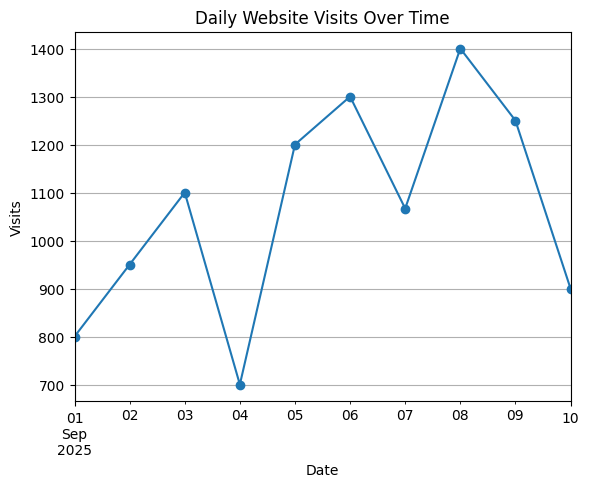

In [5]:
plt.figure(figsize=(8,5))
df.plot(x="Date", y="Visits", kind="line", legend=False, marker="o")
plt.title("Daily Website Visits Over Time")
plt.xlabel("Date")
plt.ylabel("Visits")
plt.grid(True)
plt.savefig("daily_visits.png")
plt.show()

Bar Chart – Visits per Weekday

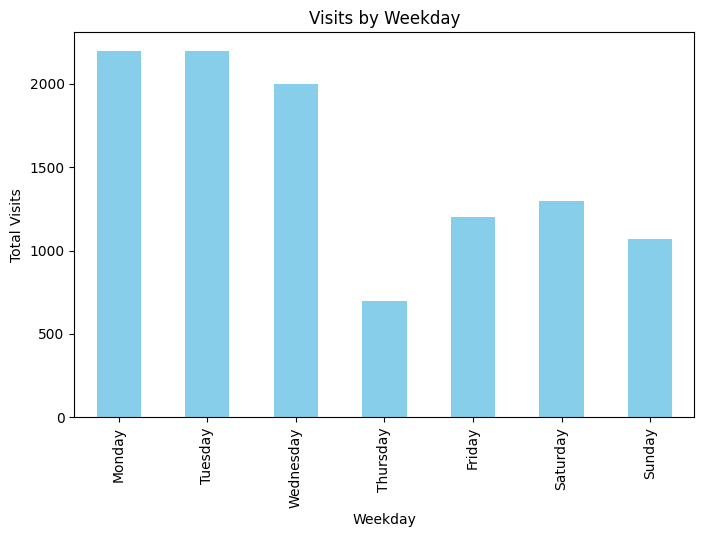

In [6]:
plt.figure(figsize=(8,5))
weekday_visits = df.groupby("Weekday")["Visits"].sum().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
weekday_visits.plot(kind="bar", color="skyblue")
plt.title("Visits by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Visits")
plt.savefig("visits_weekday.png")
plt.show()

Scatter Plot – PageViews vs Session Duration

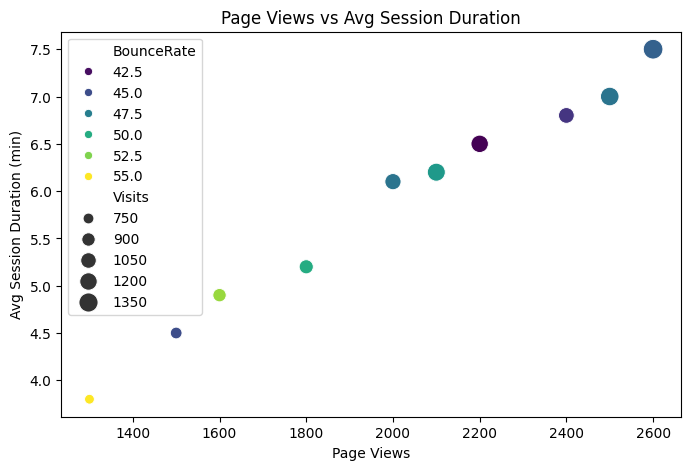

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="PageViews", y="AvgSessionDuration", hue="BounceRate", palette="viridis", size="Visits", sizes=(50,200))
plt.title("Page Views vs Avg Session Duration")
plt.xlabel("Page Views")
plt.ylabel("Avg Session Duration (min)")
plt.savefig("scatter_pageviews_session.png")
plt.show()

Box Plot – Bounce Rate by Weekday

C:\Users\priya\AppData\Local\Temp\ipykernel_17592\3363753150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Weekday", y="BounceRate", palette="Set2")


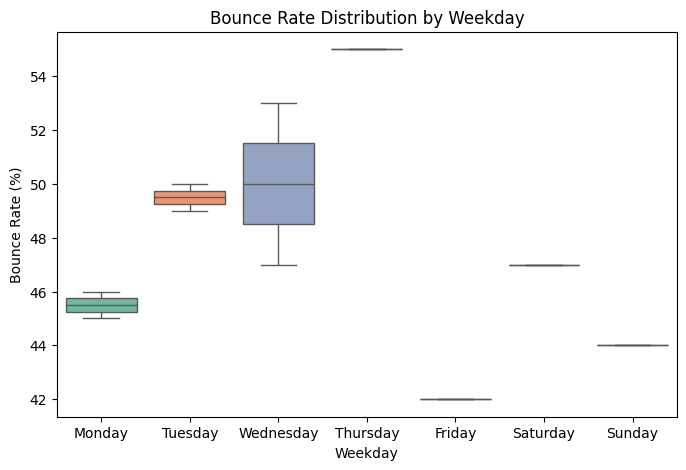

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Weekday", y="BounceRate", palette="Set2")
plt.title("Bounce Rate Distribution by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Bounce Rate (%)")
plt.savefig("boxplot_bouncerate_weekday.png")
plt.show()

Pairplot – Metrics Relationships

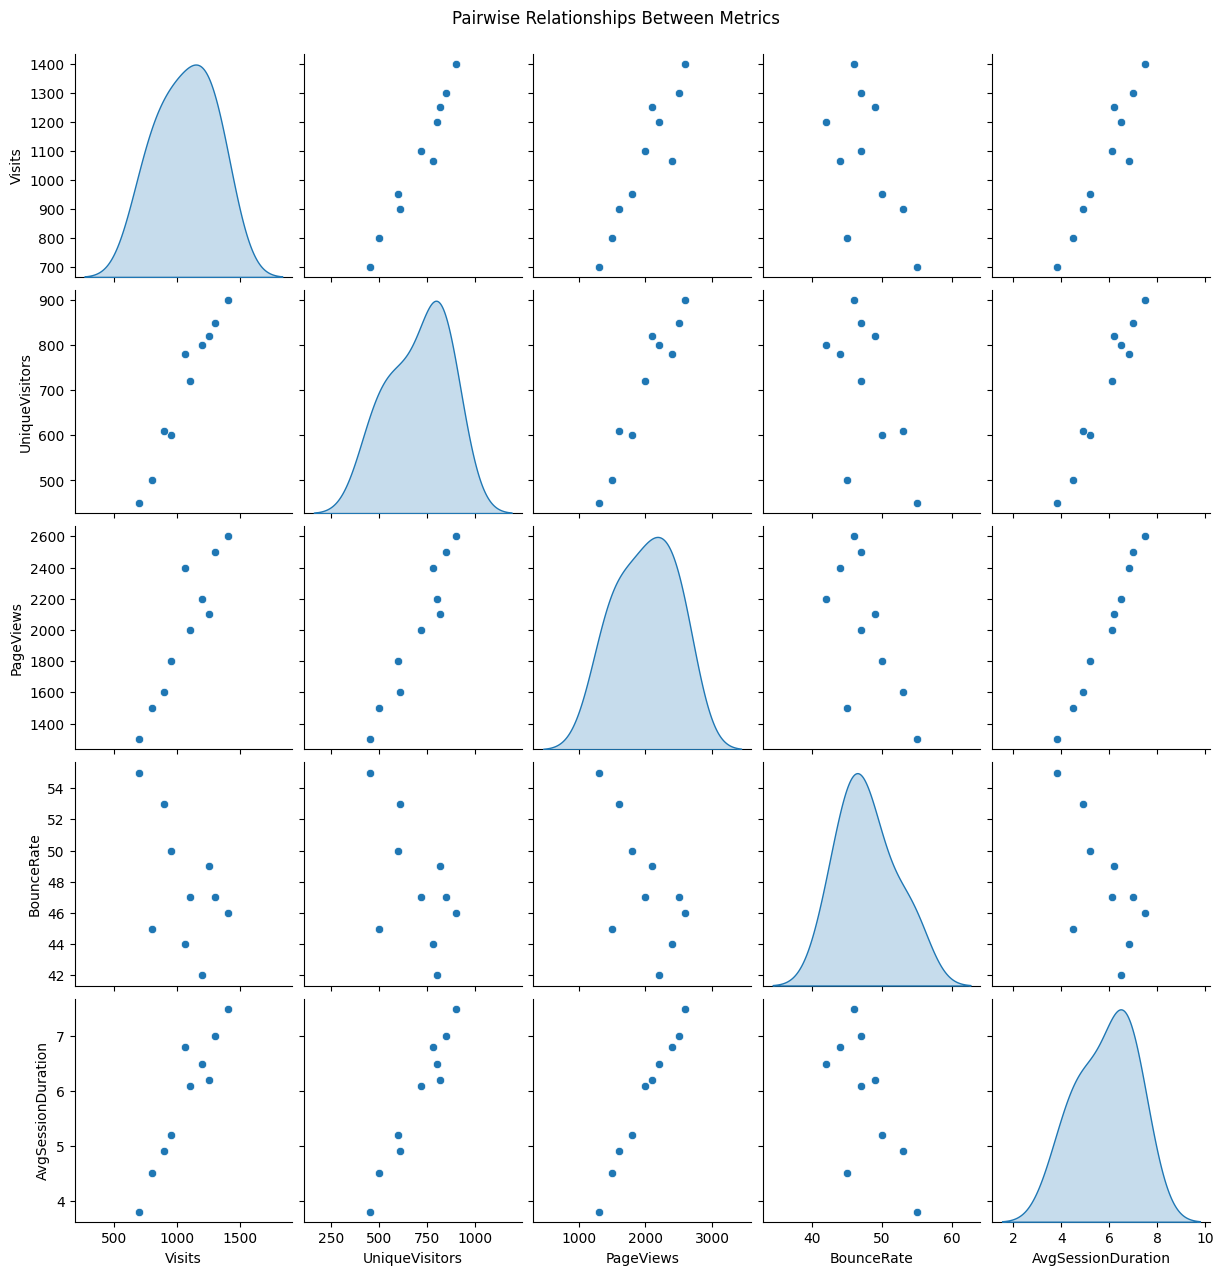

In [9]:
sns.pairplot(df[["Visits","UniqueVisitors","PageViews","BounceRate","AvgSessionDuration"]], diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Metrics", y=1.02)
plt.savefig("pairplot_metrics.png")
plt.show()

Heatmap – Correlation

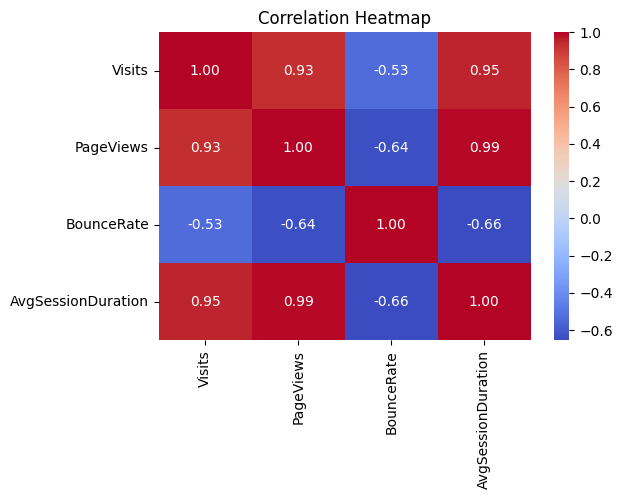

In [10]:
plt.figure(figsize=(6,4))
corr = df[["Visits","PageViews","BounceRate","AvgSessionDuration"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("heatmap_correlation.png")
plt.show()